In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv("microbenchmark-MutexStdQueue.csv", delim_whitespace=True)

max_num_producers = df["num_producers"].max()
max_num_consumers = df["num_consumers"].max()
num_elements = df["num_elements"].max()
num_iterations = df.shape[0] // (max_num_producers * max_num_consumers)


times = np.zeros((max_num_producers, max_num_consumers, num_iterations))
for (i, j), group_df in df.groupby(["num_producers", "num_consumers"]):
    times[i-1, j-1, :] = group_df["time"].values

In [82]:
df = pd.read_csv("microbenchmark-concurrent-queue.csv", delim_whitespace=True)

max_num_producers = df["num_producers"].max()
max_num_consumers = df["num_consumers"].max()
num_elements = df["num_elements"].max()
num_iterations = df.shape[0] // (max_num_producers * max_num_consumers)


times = np.zeros((max_num_producers, max_num_consumers, num_iterations))
for (i, j), group_df in df.groupby(["num_producers", "num_consumers"]):
    times[i-1, j-1, :] = group_df["time (ms)"].values

In [84]:
df

,data_structure,num_producers,num_consumers,num_elements,capacity,time (ms)
0,concurrent-queue,1,1,100000,32768,13.13750
1,concurrent-queue,1,1,100000,32768,10.35940
2,concurrent-queue,1,1,100000,32768,10.48720
3,concurrent-queue,1,1,100000,32768,9.66342
4,concurrent-queue,1,1,100000,32768,8.92285
...,...,...,...,...,...,...
1275,concurrent-queue,16,16,100000,32768,198.90400
1276,concurrent-queue,16,16,100000,32768,232.47600
1277,concurrent-queue,16,16,100000,32768,227.18100
1278,concurrent-queue,16,16,100000,32768,264.27000


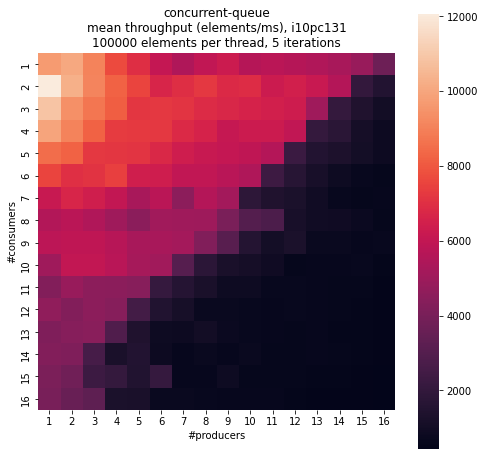

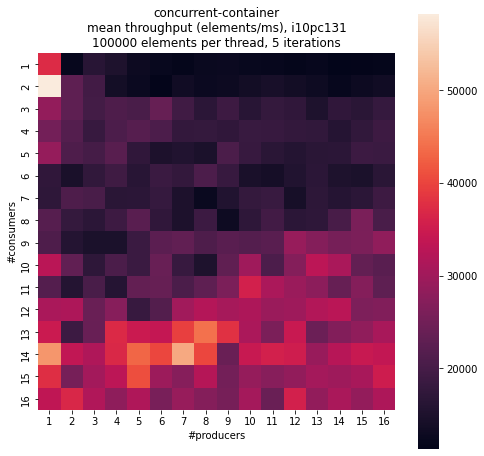

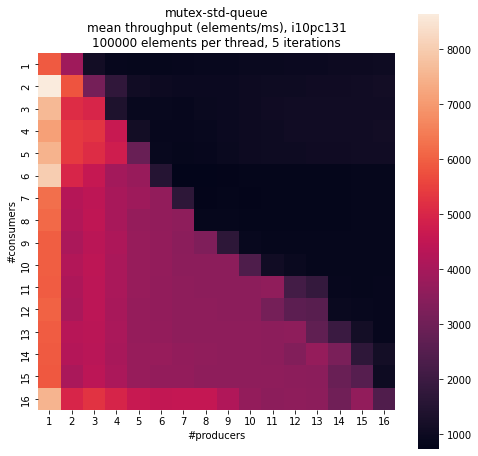

In [96]:
def plot_micro_benchmark_grid(df):
    max_num_producers = df["num_producers"].max()
    max_num_consumers = df["num_consumers"].max()
    num_elements = df["num_elements"].max()
    num_iterations = df.shape[0] // (max_num_producers * max_num_consumers)
    data_structure = df["data_structure"][0]


    times = np.zeros((max_num_producers, max_num_consumers, num_iterations))
    for (i, j), group_df in df.groupby(["num_producers", "num_consumers"]):
        times[i-1, j-1, :] = group_df["time (ms)"].values
    throughput = np.zeros_like(times)
    throughput = num_elements / times


    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title(f"{data_structure}\nmean throughput (elements/ms), i10pc131\n{num_elements} elements per thread, {num_iterations} iterations")
    sns.heatmap((throughput).mean(axis=2), square=True, xticklabels=range(1, max_num_producers+1), yticklabels=range(1, max_num_producers+1), ax=ax)
    ax.set_xlabel("#producers")
    ax.set_ylabel("#consumers")
    plt.savefig(f"microbenchmark-{data_structure}-throughput-grid.pdf", dpi=300)
    plt.show()

df = pd.read_csv("microbenchmark-concurrent-queue.csv", delim_whitespace=True)
plot_micro_benchmark_grid(df)
df = pd.read_csv("microbenchmark-concurrent-container.csv", delim_whitespace=True)
plot_micro_benchmark_grid(df)
df = pd.read_csv("microbenchmark-mutex-std-queue.csv", delim_whitespace=True)
plot_micro_benchmark_grid(df)

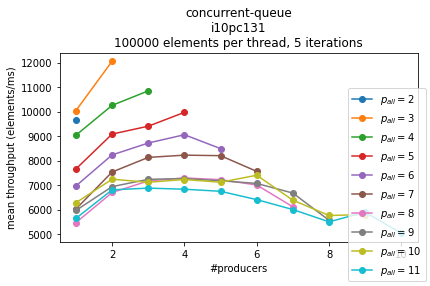

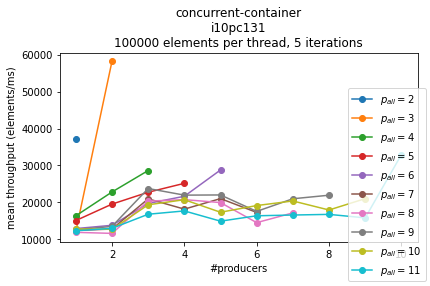

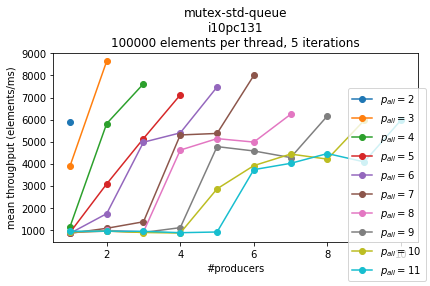

In [97]:
def plot_p(df):
    max_num_producers = df["num_producers"].max()
    max_num_consumers = df["num_consumers"].max()
    num_elements = df["num_elements"].max()
    num_iterations = df.shape[0] // (max_num_producers * max_num_consumers)
    data_structure = df["data_structure"][0]

    times = np.zeros((max_num_producers, max_num_consumers, num_iterations))
    for (i, j), group_df in df.groupby(["num_producers", "num_consumers"]):
        times[i-1, j-1, :] = group_df["time (ms)"].values
    throughput = np.zeros_like(times)
    throughput = num_elements / times
    
    fig, ax = plt.subplots()
    ax.set_xlabel("#producers")
    ax.set_ylabel("mean throughput (elements/ms)")
    ax.set_title(f"{data_structure}\ni10pc131\n{num_elements} elements per thread, {num_iterations} iterations")

    for p_all in range(2, 10+2):
        t = np.zeros((p_all-1, num_iterations))
        for p_p in range(1, p_all):
            p_c = p_all - p_p
            t[p_p-1] = times[p_p-1,p_c-1]

        x = np.arange(1, p_all)
        ax.plot(x, (num_elements / t).mean(axis=1), label=f"$p_{{all}} = {p_all}$", marker="o")

    fig.legend(loc="lower right")
    fig.tight_layout()
    plt.savefig(f"microbenchmark-{data_structure}-throughput-num-threads.pdf", dpi=300)
    plt.show()

df = pd.read_csv("microbenchmark-concurrent-queue.csv", delim_whitespace=True)
plot_p(df)
df = pd.read_csv("microbenchmark-concurrent-container.csv", delim_whitespace=True)
plot_p(df)
df = pd.read_csv("microbenchmark-mutex-std-queue.csv", delim_whitespace=True)
plot_p(df)